### IMPORTATIONS

# 🚀 Credit Card Fraud Detection using XGBoost
## 🔹 Overview
- **Dataset:** Credit Card Transactions
- **Model:** XGBoost (Optimized with Hyperparameter Tuning)
- **Performance:** AUC-ROC = 0.9998, F1-score = 0.9998


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### DATA PRE-PROCESSING

In [4]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [7]:
fraud_count = np.sum(df['Class']==1)

In [8]:
print(fraud_count)

284315


In [9]:
X = df.drop(['Class'], axis=1)
X = X.drop(columns=['id'])
y = df['Class']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### MODEL BUILDING, HYPERPARAMETER TUNING AND TRAINING

In [11]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
fraud_weight = len(y) / (2 * Counter(y)[1])
model = xgb.XGBClassifier(scale_pos_weight=fraud_weight,reg_alpha=0.5, reg_lambda=5, max_depth=3, min_child_weights=5, subsample=0.7, colsample_bytree=0.7, use_label_encoder=False, eval_metric='logloss')

In [12]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, min_child_weights=5,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

### MODEL METRICS

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.58%


In [15]:
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score
print(f"Log Loss: {log_loss(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")

Log Loss: 0.15170581416964843
F1 Score: 0.9958010222580909
Precision Score: 0.9948701169706814
Recall Score: 0.996733671283234


In [16]:
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train Scores:")
print("Log Loss:", log_loss(y_train, model.predict_proba(X_train)))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))

print("\nTest Scores:")
print("Log Loss:", log_loss(y_test, model.predict_proba(X_test)))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))


Train Scores:
Log Loss: 0.020126061172174376
F1 Score: 0.9959411466260781
Precision: 0.995076388749473
Recall: 0.9968074088226127

Test Scores:
Log Loss: 0.020525310651277617
F1 Score: 0.9958010222580909
Precision: 0.9948701169706814
Recall: 0.996733671283234


In [17]:
from sklearn.metrics import roc_auc_score
y_test_probs =  model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_probs)
print(f"AUC: {auc}")

AUC: 0.999844722505864


In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print(f"AUC Scores: {auc_scores}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:08:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_child_w

AUC Scores: [0.99979605 0.99987372 0.999848   0.99986158 0.99984191]


### VISUALIZATIONS

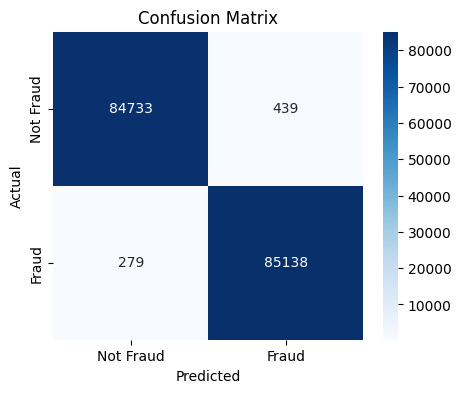

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


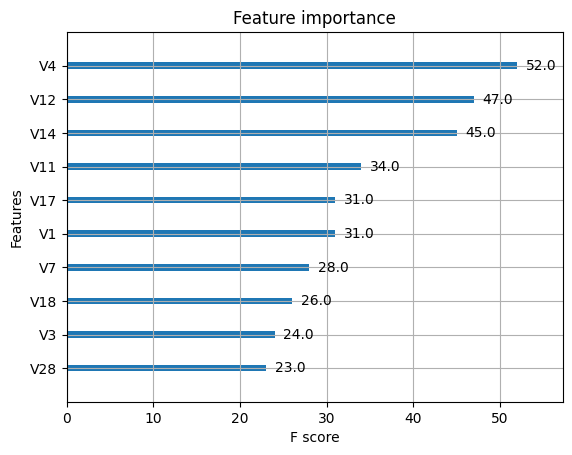

In [20]:
xgb.plot_importance(model, max_num_features=10)
plt.show()


In [21]:
import joblib
joblib.dump(model, 'creditcard_model.pkl')

['creditcard_model.pkl']